# Milestone 3
# Kumaran Singaram

## Best Practices for Assignments & Milestones

- <b>Break the assignment into sections - one section per numbered requirement.</b> Each assignment has numbered requirements/instructions e.g. "1. Read the CIFAR-10 dataset". Each requirement should have at least one markdown cell and at least one code cell. Feel free to combine sections or make other sensible changes if that makes sense for your code and is still clear. The intent is to give you a useful structure and to make sure you get full credit for your work.

- <b>Break the milestone into sections - one section for each item in the rubric.</b> Each milestone has rubric items e.g. "5. Handle class imbalance problem". Each rubric item should have at least one markdown cell and at least one code cell. Feel free to combine sections or make other sensible changes if that makes sense for your code and is still clear. The intent is to give you a useful structure and to make sure you get full credit for your work.

- <b>Include comments, with block comments preferred over in-line comments.</b> A good habit is to start each code cell with comments.

The above put into a useful pattern:

<b>Markdown cell:</b> Requirement #1: Read the CIFAR-10 dataset<br>
<b>Code cell:</b>: Comments followed by code<br>
<b>Markdown cell:</b> Requirement #2: Explore the data<br>
<b>Code cell:</b>: Comments followed by code<br>
<b>Markdown cell:</b> Requirement #3: Preprocess the data and prepare for classification<br>
<b>Code cell:</b>: Comments followed by code<br>

For more information:
- A good notebook example: [DataFrame Basics](https://github.com/Tanu-N-Prabhu/Python/blob/master/Pandas/Pandas_DataFrame.ipynb) 
- More example notebooks: [A gallery of interesting Jupyter Notebooks](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks#pandas-for-data-analysis)
- [PEP 8 on commenting](https://www.python.org/dev/peps/pep-0008/)
- [PEP 257 - docstrings](https://www.python.org/dev/peps/pep-0257/)

Occasionally an assignment or milestone will ask you to do something other than write Python code e.g. ask you turn in a .docx file. In which case, please use logical structuring, but the specific notes above may not apply.

**Data Preparation Introduction**

In using the google play store data, I have access to the top ranked mobile applications with a variety of useful indicators. I will be using the category, rating, reviews, size, installs, genres and content rating to predict whether the App if a free or paid app. 

This can help determine some of the variables driving the top ranking apps. I need to remove the missing values and replace them with mean values wherever necessary. The size column also contains string values and these need to be converted into numeric values. I need to remove the columns I will not be using. These include, Last Updated, Current Ver, and Android Ver. I can then apply K-Means clustering and conduct a logistic regression and a decision tree classifier.

In [81]:
#import necessary packages and read in dataset
import pandas as pd
import numpy as np

app = pd.read_csv("data/googleplaystore.csv")

app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Facebook,SOCIAL,4.1,78158306,Varies with device,"1,000,000,000+",Free,Teen,Social,3-Aug-18,Varies with device,Varies with device
1,Facebook,SOCIAL,4.1,78128208,Varies with device,"1,000,000,000+",Free,Teen,Social,3-Aug-18,Varies with device,Varies with device
2,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,Everyone,Communication,3-Aug-18,Varies with device,Varies with device
3,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,Everyone,Communication,3-Aug-18,Varies with device,Varies with device
4,WhatsApp Messenger,COMMUNICATION,4.4,69109672,Varies with device,"1,000,000,000+",Free,Everyone,Communication,3-Aug-18,Varies with device,Varies with device


**Data Types, Number of observations and attributes**

In [82]:
app.shape

(10839, 12)

In [83]:
app.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

**Attribute Description**

Definition and Data Type

App - Mobile Application Name

Category - Identifies the category of the mobile application. Dtype: Object

Rating - User rating of each mobile application. Dtype: Float

Reviews - # of user reviews on the mobile application. Dtype: Integer

Size - Size of the mobile application. Dtype: Object

Installs - Number of application installs. Dtype: Object

Type - Paid or Free. Dtype: Object

Content Rating - Maturity rating. Dtype: Object

Genres - Genre of the mobile application. Dtype: Object

Last Updated - Last date of application update. Dtype: Object

Current Ver - Mobile version. Dtype: Object

Android Ver - Android mobile version. Dtype: Object

In [84]:
#begin process to convert size column to a numeric column

app['Size'] = app['Size'].replace('Varies with device', -1)
app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Facebook,SOCIAL,4.1,78158306,-1,"1,000,000,000+",Free,Teen,Social,3-Aug-18,Varies with device,Varies with device
1,Facebook,SOCIAL,4.1,78128208,-1,"1,000,000,000+",Free,Teen,Social,3-Aug-18,Varies with device,Varies with device
2,WhatsApp Messenger,COMMUNICATION,4.4,69119316,-1,"1,000,000,000+",Free,Everyone,Communication,3-Aug-18,Varies with device,Varies with device
3,WhatsApp Messenger,COMMUNICATION,4.4,69119316,-1,"1,000,000,000+",Free,Everyone,Communication,3-Aug-18,Varies with device,Varies with device
4,WhatsApp Messenger,COMMUNICATION,4.4,69109672,-1,"1,000,000,000+",Free,Everyone,Communication,3-Aug-18,Varies with device,Varies with device


In [85]:
#convert numbers to thousands and millions

app['Size'] = app['Size'].replace({'k': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)

In [86]:
#replace -1 values to NaN

app['Size'] = app['Size'].replace(-1, np.nan)

app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Facebook,SOCIAL,4.1,78158306,NaN,"1,000,000,000+",Free,Teen,Social,3-Aug-18,Varies with device,Varies with device
1,Facebook,SOCIAL,4.1,78128208,NaN,"1,000,000,000+",Free,Teen,Social,3-Aug-18,Varies with device,Varies with device
2,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,"1,000,000,000+",Free,Everyone,Communication,3-Aug-18,Varies with device,Varies with device
3,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,"1,000,000,000+",Free,Everyone,Communication,3-Aug-18,Varies with device,Varies with device
4,WhatsApp Messenger,COMMUNICATION,4.4,69109672,NaN,"1,000,000,000+",Free,Everyone,Communication,3-Aug-18,Varies with device,Varies with device


**Show Data Preparation**

In [87]:
#drop unused columns in modeling
app = app.drop(columns = ['Last Updated', 'Current Ver', 'Android Ver', 'App'])
app = app.rename(columns = {'Type': 'Paid?'})
app.head()

,Category,Rating,Reviews,Size,Installs,Paid?,Content Rating,Genres
0,SOCIAL,4.1,78158306,NaN,"1,000,000,000+",Free,Teen,Social
1,SOCIAL,4.1,78128208,NaN,"1,000,000,000+",Free,Teen,Social
2,COMMUNICATION,4.4,69119316,NaN,"1,000,000,000+",Free,Everyone,Communication
3,COMMUNICATION,4.4,69119316,NaN,"1,000,000,000+",Free,Everyone,Communication
4,COMMUNICATION,4.4,69109672,NaN,"1,000,000,000+",Free,Everyone,Communication


In [88]:
#impute missing values of the Rating column with the mean

def fill_mean(x):
    x = pd.to_numeric(x, errors = 'coerce')
    dropped_na = x[~np.isnan(x)]
    mean = np.mean(dropped_na)
    x[np.isnan(x)] = mean
    return x

app['Rating'] = fill_mean(app['Rating'])
app['Size'] = fill_mean(app['Size'])
    
app.head()

,Category,Rating,Reviews,Size,Installs,Paid?,Content Rating,Genres
0,SOCIAL,4.1,78158306,2.151653e+07,"1,000,000,000+",Free,Teen,Social
1,SOCIAL,4.1,78128208,2.151653e+07,"1,000,000,000+",Free,Teen,Social
2,COMMUNICATION,4.4,69119316,2.151653e+07,"1,000,000,000+",Free,Everyone,Communication
3,COMMUNICATION,4.4,69119316,2.151653e+07,"1,000,000,000+",Free,Everyone,Communication
4,COMMUNICATION,4.4,69109672,2.151653e+07,"1,000,000,000+",Free,Everyone,Communication


In [89]:
#mobile applications are driven by network effects which leads to many outlier values and a higher comparable variation
#cap outliers in the review column to its 99th percentile

app['Reviews'] = np.clip(app['Reviews'], 0, app['Reviews'].quantile(0.99))

app.head()

,Category,Rating,Reviews,Size,Installs,Paid?,Content Rating,Genres
0,SOCIAL,4.1,8922775.32,2.151653e+07,"1,000,000,000+",Free,Teen,Social
1,SOCIAL,4.1,8922775.32,2.151653e+07,"1,000,000,000+",Free,Teen,Social
2,COMMUNICATION,4.4,8922775.32,2.151653e+07,"1,000,000,000+",Free,Everyone,Communication
3,COMMUNICATION,4.4,8922775.32,2.151653e+07,"1,000,000,000+",Free,Everyone,Communication
4,COMMUNICATION,4.4,8922775.32,2.151653e+07,"1,000,000,000+",Free,Everyone,Communication


In [90]:
#setting numeric columns
num_cols = ['Rating', 'Reviews', 'Size']    
app.head()

,Category,Rating,Reviews,Size,Installs,Paid?,Content Rating,Genres
0,SOCIAL,4.1,8922775.32,2.151653e+07,"1,000,000,000+",Free,Teen,Social
1,SOCIAL,4.1,8922775.32,2.151653e+07,"1,000,000,000+",Free,Teen,Social
2,COMMUNICATION,4.4,8922775.32,2.151653e+07,"1,000,000,000+",Free,Everyone,Communication
3,COMMUNICATION,4.4,8922775.32,2.151653e+07,"1,000,000,000+",Free,Everyone,Communication
4,COMMUNICATION,4.4,8922775.32,2.151653e+07,"1,000,000,000+",Free,Everyone,Communication


In [91]:
#consolidate categories
app['Paid?'] = app['Paid?'].replace({'Paid': 'yes', 
                                   'Free': 'no'})
pd.value_counts(app['Paid?'])

no     10039
yes      800
Name: Paid?, dtype: int64

In [92]:
#consolidate categories
app['Content Rating'] = app['Content Rating'].replace({'Adults only 18+': 'Adults/Unrated',
                                                      'Unrated': 'Adults/Unrated'})
pd.value_counts(app['Content Rating'])

Everyone          8714
Teen              1208
Mature 17+         499
Everyone 10+       413
Adults/Unrated       5
Name: Content Rating, dtype: int64

In [93]:
app['Genres'].value_counts()

Tools                      843
Education                  757
Entertainment              667
Medical                    463
Business                   460
Productivity               424
Sports                     402
Personalization            392
Communication              388
Lifestyle                  383
Action                     382
Finance                    366
Health & Fitness           343
Photography                335
Social                     295
News & Magazines           283
Casual                     270
Shopping                   260
Travel & Local             258
Arcade                     237
Books & Reference          234
Dating                     234
Simulation                 218
Video Players & Editors    178
Puzzle                     167
Maps & Navigation          137
Food & Drink               127
Role Playing               123
Racing                     119
Strategy                   110
Adventure                   91
House & Home                88
Librarie

In [94]:
#use get dummies for content rating category
OneHot = pd.get_dummies(app['Content Rating'], prefix = ['Content Rating'])

OneHot.head()

,['Content Rating']_Adults/Unrated,['Content Rating']_Everyone,['Content Rating']_Everyone 10+,['Content Rating']_Mature 17+,['Content Rating']_Teen
0,0,0,0,0,1
1,0,0,0,0,1
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


**Binary Choice Question**

In this classifier, I will be looking to predict whether an application is free or paid. This references the 'Type' label in the dataset.

In [95]:
app['Paid?'].value_counts()

no     10039
yes      800
Name: Paid?, dtype: int64

In [96]:
app_num = app[num_cols]
app_num.head()

,Rating,Reviews,Size
0,4.1,8922775.32,2.151653e+07
1,4.1,8922775.32,2.151653e+07
2,4.4,8922775.32,2.151653e+07
3,4.4,8922775.32,2.151653e+07
4,4.4,8922775.32,2.151653e+07


In [97]:
#subset numeric columns
#z-normalize numeric columns 

def normalize(x):
    x_norm = ((x - np.mean(x))/np.std(x))
    return x_norm

for col in app_num:
    app[col] = normalize(app[col])
    
app.head()

,Category,Rating,Reviews,Size,Installs,Paid?,Content Rating,Genres
0,SOCIAL,-0.191598,7.06668,-3.591075e-15,"1,000,000,000+",no,Teen,Social
1,SOCIAL,-0.191598,7.06668,-3.591075e-15,"1,000,000,000+",no,Teen,Social
2,COMMUNICATION,0.434829,7.06668,-3.591075e-15,"1,000,000,000+",no,Everyone,Communication
3,COMMUNICATION,0.434829,7.06668,-3.591075e-15,"1,000,000,000+",no,Everyone,Communication
4,COMMUNICATION,0.434829,7.06668,-3.591075e-15,"1,000,000,000+",no,Everyone,Communication


**Apply K-Means clusters**

In [98]:
#apply kmeans
from sklearn.cluster import KMeans
n_clusters = 3
app_num = app.loc[:, ['Rating', 'Reviews', 'Size']]

X = app_num
kmeans = KMeans(n_clusters = n_clusters, random_state = 0)
kmeans.fit(X)
app_num['cluster'] = kmeans.predict(X)
app_num.head()

,Rating,Reviews,Size,cluster
0,-0.191598,7.06668,-3.591075e-15,1
1,-0.191598,7.06668,-3.591075e-15,1
2,0.434829,7.06668,-3.591075e-15,1
3,0.434829,7.06668,-3.591075e-15,1
4,0.434829,7.06668,-3.591075e-15,1


In [99]:
app_featurized = pd.concat([app_num, OneHot], axis = 1)

kmeans = KMeans(n_clusters = n_clusters, random_state = 0)
kmeans.fit(app_featurized)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [100]:
#add cluster column
app['cluster'] = kmeans.predict(app_featurized)
app.head()

,Category,Rating,Reviews,Size,Installs,Paid?,Content Rating,Genres,cluster
0,SOCIAL,-0.191598,7.06668,-3.591075e-15,"1,000,000,000+",no,Teen,Social,2
1,SOCIAL,-0.191598,7.06668,-3.591075e-15,"1,000,000,000+",no,Teen,Social,2
2,COMMUNICATION,0.434829,7.06668,-3.591075e-15,"1,000,000,000+",no,Everyone,Communication,2
3,COMMUNICATION,0.434829,7.06668,-3.591075e-15,"1,000,000,000+",no,Everyone,Communication,2
4,COMMUNICATION,0.434829,7.06668,-3.591075e-15,"1,000,000,000+",no,Everyone,Communication,2


In [101]:
app['cluster'] = app['cluster'].astype('object')

In [102]:
#differentiate categorical and numeric
num_cols = app.select_dtypes(['integer', 'float']).columns
cat_cols = app.select_dtypes(['object']).drop(columns = "Paid?").columns

print("Numeric columns are {}.".format(", ".join(num_cols)))
print("Categorical columns are {}.".format(", ".join(cat_cols)))

Numeric columns are Rating, Reviews, Size.
Categorical columns are Category, Installs, Content Rating, Genres, cluster.


**Split data into training and test sets.**

In [103]:
#split train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(app.drop(columns = "Paid?"), app["Paid?"], 
                                                    test_size = 0.15, random_state = 42)

X_train = X_train.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)

print(f"Training data has {X_train.shape[0]} rows.")
print(f"Test data has {X_test.shape[0]} rows.")

Training data has 9213 rows.
Test data has 1626 rows.


In [104]:
app['Category'].value_counts()

FAMILY                 1971
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

In [105]:
#one hot encode non numeric columns
from sklearn.preprocessing import OneHotEncoder

onehoter = OneHotEncoder(sparse = False, drop = "first")
onehoter.fit(X_train[cat_cols])
onehot_cols = onehoter.get_feature_names(cat_cols)
X_train_onehot = pd.DataFrame(onehoter.transform(X_train[cat_cols]), columns = onehot_cols)
X_test_onehot = pd.DataFrame(onehoter.transform(X_test[cat_cols]), columns = onehot_cols)

In [106]:
X_train_norm = X_train[num_cols]
X_test_norm = X_test[num_cols]
X_train_norm.head()

,Rating,Reviews,Size
0,0.226020,7.066680,-3.591075e-15
1,-1.235642,-0.255627,-5.936394e-01
2,0.017211,-0.257329,-2.658889e-01
3,-1.653260,-0.258956,2.642955e-01
4,0.434829,-0.258971,-7.189557e-01


**Create a classification model for the expert label based on the training data.**

In [107]:
X_train_featurized = X_train_onehot # add one-hot-encoded columns
X_test_featurized = X_test_onehot   # add one-hot-encoded columns
X_train_featurized[num_cols] = X_train_norm # add numeric columns
X_test_featurized[num_cols] = X_test_norm   # add numeric columns

del X_train_norm, X_test_norm, X_train_onehot, X_test_onehot

print("Featurized training data has {} rows and {} columns.".format(*X_train_featurized.shape))
print("Featurized test data has {} rows and {} columns.".format(*X_test_featurized.shape))

Featurized training data has 9213 rows and 105 columns.
Featurized test data has 1626 rows and 105 columns.


**Conduct a logistic regression and decision tree classifier**

In [108]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(max_iter = 5000)
logit.fit(X_train_featurized, y_train)

y_hat_train = logit.predict(X_train_featurized)
y_hat_test = logit.predict(X_test_featurized)

In [109]:
#setting max depth to 4 to generalize better on the test set

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth = 4)
dtree.fit(X_train_featurized, y_train)

y_hat_train_dt = dtree.predict(X_train_featurized)
y_hat_test_dt = dtree.predict(X_test_featurized)

**Apply classifiers to the test data to predict probabilities and determine accuracy rate**

In [110]:
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_train, y_hat_train) * 100
acc_test = accuracy_score(y_test, y_hat_test) * 100

print("Accuracy on the training data: {:.0f}%.".format(acc_train))
print("Accuracy on the test data: {:.0f}%.".format(acc_test))

Accuracy on the training data: 93%.
Accuracy on the test data: 93%.


In [111]:
#decision tree accuracy

acc_train_dt = accuracy_score(y_train, y_hat_train_dt) * 100
acc_test_dt = accuracy_score(y_test, y_hat_test_dt) * 100

print("Accuracy on the training data: {:.0f}%.".format(acc_train_dt))
print("Accuracy on the test data: {:.0f}%.".format(acc_test_dt))

Accuracy on the training data: 93%.
Accuracy on the test data: 93%.


In [112]:
#create equation with log-odds ratio
variables = list(X_train_featurized.columns)
coefficients = map(str, list(logit.coef_[0]))
intercept = logit.intercept_[0]

var_coef_pairs = list(zip(variables, coefficients))
equation = str(intercept) + " + \n" + " + \n".join([v + " * " + c for v,c in var_coef_pairs])
print(equation)

-3.323182323369886 + 
Category_AUTO_AND_VEHICLES * -0.19492335477887585 + 
Category_BEAUTY * -0.6654965219195715 + 
Category_BOOKS_AND_REFERENCE * 0.22590722907336233 + 
Category_BUSINESS * -0.5140833619505282 + 
Category_COMICS * -0.6478622754248187 + 
Category_COMMUNICATION * 0.3980440696814302 + 
Category_DATING * -0.38400593968257807 + 
Category_EDUCATION * 0.7388635088967209 + 
Category_ENTERTAINMENT * 1.2710328784862364 + 
Category_EVENTS * -0.6060060162683533 + 
Category_FAMILY * 1.2151667715768106 + 
Category_FINANCE * -0.10182019058026123 + 
Category_FOOD_AND_DRINK * -0.5093915881109186 + 
Category_GAME * 0.9329562855443919 + 
Category_HEALTH_AND_FITNESS * 0.13809443625253956 + 
Category_HOUSE_AND_HOME * -0.6887617552932005 + 
Category_LIBRARIES_AND_DEMO * -0.580470341083653 + 
Category_LIFESTYLE * -0.10572812766936801 + 
Category_MAPS_AND_NAVIGATION * -0.033787371148095754 + 
Category_MEDICAL * 0.6014376780256879 + 
Category_NEWS_AND_MAGAZINES * -0.8203493267782453 + 
Categor

In [113]:
#use predict proba to get the probabilitylogit.predict_proba(X_test_featurized)

logit.predict_proba(X_test_featurized)

array([[0.98689808, 0.01310192],
       [0.99796491, 0.00203509],
       [0.96015326, 0.03984674],
       ...,
       [0.99105904, 0.00894096],
       [0.97851815, 0.02148185],
       [0.80326738, 0.19673262]])

In [114]:
dtree.predict_proba(X_test_featurized)

array([[0.99099815, 0.00900185],
       [0.99099815, 0.00900185],
       [0.89449424, 0.10550576],
       ...,
       [0.89449424, 0.10550576],
       [0.99099815, 0.00900185],
       [0.89449424, 0.10550576]])

**Confusion Matrix from Predicted Values**

The default threshold in this logistic regression is 0.5. This is the probability threshold used in this exercise to cast a wider net that catches more of the paid mobile applications. The cost of a false positive in this model is not very high. We want to understand the characteristics of a paid mobile application.

In [115]:
#show confusion matrix on logistic regression model
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, y_hat_test)

cf

array([[1499,    5],
       [ 116,    6]], dtype=int64)

**Logistic Regression Results**

True Positives: 6

False Positives: 5

False Negatives: 116

True Negatives: 1499

In [116]:
#show confusion matrix on decision tree classifier

cf_dt = confusion_matrix(y_test, y_hat_test_dt)

cf_dt

array([[1499,    5],
       [ 109,   13]], dtype=int64)

**Decision Tree Results**

True Positives: 13

False Positives: 5

False Negatives: 109

True Negatives: 1499

**Precision, Recall, and F1 measures based on the Confusion Matrix.**

In [117]:
#call precision, recall, and f1 from the sklearn package
#calculate performance on each metric

from sklearn.metrics import precision_score, recall_score, f1_score

precision_train = precision_score(y_train, y_hat_train, pos_label = 'yes') * 100
precision_test = precision_score(y_test, y_hat_test, pos_label = 'yes') * 100

recall_train = recall_score(y_train, y_hat_train, pos_label = 'yes') * 100
recall_test = recall_score(y_test, y_hat_test, pos_label = 'yes') * 100

f1_train = f1_score(y_train, y_hat_train, pos_label = 'yes') * 100
f1_test = f1_score(y_test, y_hat_test, pos_label = 'yes') * 100

print("Precision = {:.0f}% and recall = {:.0f}% and f1 = {:.0f}% on the training data.".format(precision_train, recall_train, f1_train))
print("Precision = {:.0f}% and recall = {:.0f}% and f1 = {:.0f}% on the test data.".format(precision_test, recall_test, f1_test))

Precision = 61% and recall = 3% and f1 = 6% on the training data.
Precision = 55% and recall = 5% and f1 = 9% on the test data.


In [118]:
#precision, recall, and f1 on decision tree

precision_train_dt = precision_score(y_train, y_hat_train_dt, pos_label = 'yes') * 100
precision_test_dt = precision_score(y_test, y_hat_test_dt, pos_label = 'yes') * 100

recall_train_dt = recall_score(y_train, y_hat_train_dt, pos_label = 'yes') * 100
recall_test_dt = recall_score(y_test, y_hat_test_dt, pos_label = 'yes') * 100

f1_train_dt = f1_score(y_train, y_hat_train_dt, pos_label = 'yes') * 100
f1_test_dt = f1_score(y_test, y_hat_test_dt, pos_label = 'yes') * 100

print("Precision = {:.0f}% and recall = {:.0f}% and f1 = {:.0f}% on the training data.".format(precision_train_dt, recall_train_dt, f1_train_dt))
print("Precision = {:.0f}% and recall = {:.0f}% and f1 = {:.0f}% on the test data.".format(precision_test_dt, recall_test_dt, f1_test_dt))

Precision = 66% and recall = 10% and f1 = 18% on the training data.
Precision = 72% and recall = 11% and f1 = 19% on the test data.


**Calculate the ROC Curve and it's AUC using sklearn. Present the ROC curve and AUC.**

In [119]:
#construct the roc curve
#calculate and show AUC

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc(models, model_names):
    plt.figure(0, figsize = [8, 7]).clf()
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    for ii, model in enumerate(models):
        y_prob_test = model.predict_proba(X_test_featurized)[:, 1]
        fpr, tpr, threshold = roc_curve(y_test, y_prob_test, pos_label = "yes")
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label = "{} AUC = {:0.2f}".format(model_names[ii], roc_auc))

    plt.legend(loc = 'lower right');

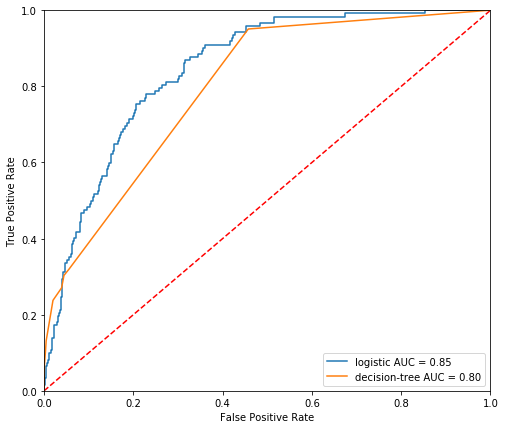

In [120]:
#show plot
plot_roc([logit, dtree], ['logistic', 'decision-tree'])

**Summary**



The ROC curve above does a great job of illustrating the trade offs in this model. We can see that the logistic regression model does a better job of predicting accurately, whether an app is paid or free. But the problem with it is that it is less willing to be incorrect. This means that the model predicts less True Positives and False Positives. Within the context of this exercise, this is not a good thing. While I like that it's more accurate, I prefer it to also be better able to highlight paid applications.

The decision tree on the other hand, takes the opposite approach. It is a more "daring" model, predicting more false positives, but also significantly more true positives. This leads to a 17% higher precision score and 6% higher recall score. The AUC is also not bad at 0.80 vs 0.85 on the logistic regression. While both models have their flaws, I believe the decision tree does a decent job of locating more paid applications, while also being fairly accurate. Because I set out to find the characteristics of a paid mobile application and want higher precision, the decision tree is the better model despite the overall accuracy issues.